In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
#print(os.listdir("../input"))

In [ ]:
# Delete the dataset from drive.
import os

file_to_delete = '/content/winequality-red.csv'

if os.path.exists(file_to_delete):
    os.remove(file_to_delete)
    print(f"{file_to_delete} has been deleted.")
else:
    print(f"{file_to_delete} doesn't exist.")

/content/winequality-red.csv doesn't exist.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


**Introduction to the Dataset and Its Relevance**

The dataset we explore in this analysis focuses on the quality of red wines. It provides a comprehensive overview of various chemical properties and sensory aspects of red wines. The relevance of this dataset lies in the significant role that wine plays in our social and cultural experiences. Wine has been a part of human history for centuries, and the evaluation of its quality is a subject of great interest and importance.

**Why Is This Dataset Interesting?**

1. **Quality Assessment:** The dataset allows us to assess the quality of red wines based on chemical attributes. It provides valuable insights into what chemical components contribute to the perceived quality of wines.

2. **Wine Industry:** For the wine industry, understanding the factors that influence wine quality is crucial for production and quality control. Winemakers can use these insights to enhance the quality of their products.

3. **Consumer Preferences:** By examining the relationship between chemical properties and sensory quality, this dataset can help us understand what wine characteristics are most appealing to consumers.

4. **Data Analysis:** From a data analysis perspective, this dataset provides an excellent opportunity to practice exploratory data analysis techniques, including data cleaning, visualization, and hypothesis testing.

In this analysis, we aim to uncover insights about the factors that affect the quality of red wines and present our findings in an informative and engaging manner. We will explore relationships between different attributes, identify key insights, and offer recommendations for further analysis or application.



## Methodology

In this section, we outline the methodology used for our exploratory data analysis (EDA) on the red wine quality dataset. Our approach involved the following steps:

1. **Data Acquisition:** We started by loading the red wine quality dataset, which contains information on various chemical properties and sensory quality ratings of red wines.

2. **Data Preprocessing:** We conducted data preprocessing tasks to handle missing values, if any, and ensure that the dataset was clean and ready for analysis.

3. **Exploratory Data Analysis (EDA):** Our EDA included various data visualization techniques, such as heatmaps, scatter plots, and boxplots. We explored relationships between different features and quality ratings, seeking to uncover patterns and trends.

4. **Hypothesis Testing:** We performed a t-test to examine the significance of the difference in alcohol content between high-quality and low-quality wines. The results of this test provided valuable insights into the impact of alcohol content on wine quality.

5. **Categorical Plot:** We used a categorical plot to visualize the distribution of wine quality ratings. This allowed us to understand the prevalence of different quality categories within the dataset.

Throughout our analysis, we focused on gaining a deeper understanding of the factors that influence red wine quality and presented our findings through visualizations and statistical tests.


In [11]:
# Creating a pandas dataframe.
df = pd.read_csv('winequality-red.csv')

In [12]:
# Printing first three rows from the dataframe.
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [13]:
# Prints index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
# Checking for missing values and counting them in each column of the df.
df[df.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Exploratory Data Analysis

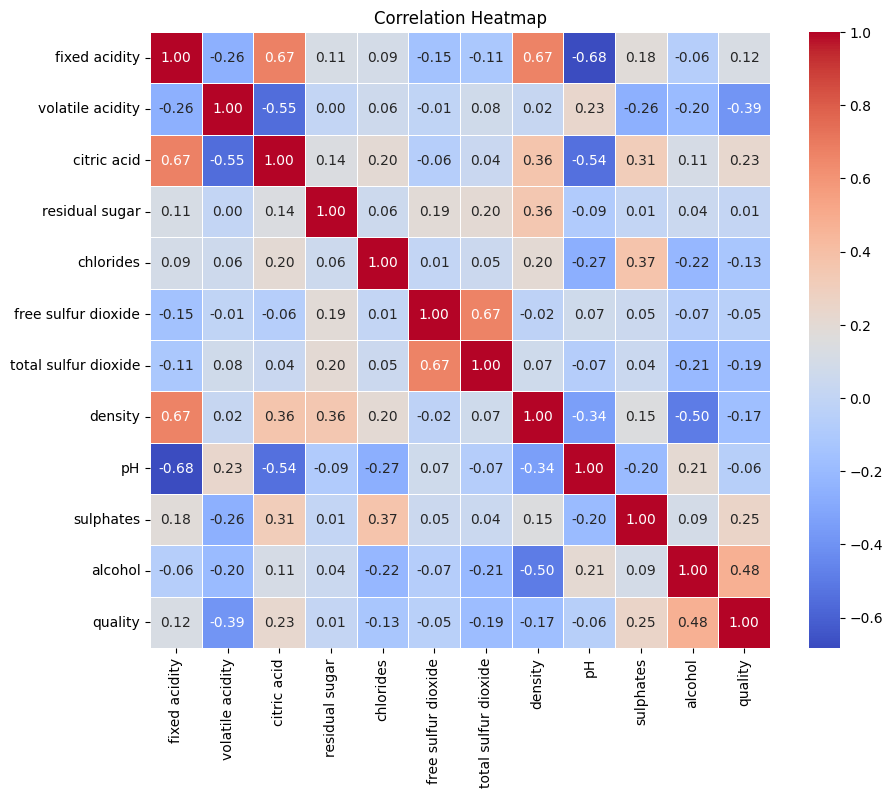

In [15]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Positively correlated

- **Citric Acid & Fixed Acidic**
- **Chlorides & Citric Acid**
- **SO2 & Sugar**
- **Total & Free SO2**
- **Density & Fixed acidic, Citric acid, and Sugar**
- **Sulphates & Citric acid, Chlorides**
- **Quality and Alcohol**

**Explanation:**

- We created a heatmap to visualize the correlation matrix of the dataset.
- Each square in the heatmap represents the correlation between two variables. The color intensity and annotation indicate the strength of the correlation. Positive correlations are warmer (closer to 1), while negative correlations are cooler (closer to -1).
- This heatmap helps us identify relationships between different features in the dataset. Strong correlations can provide insights into which features might be influencing wine quality.


<Axes: xlabel='quality', ylabel='fixed acidity'>

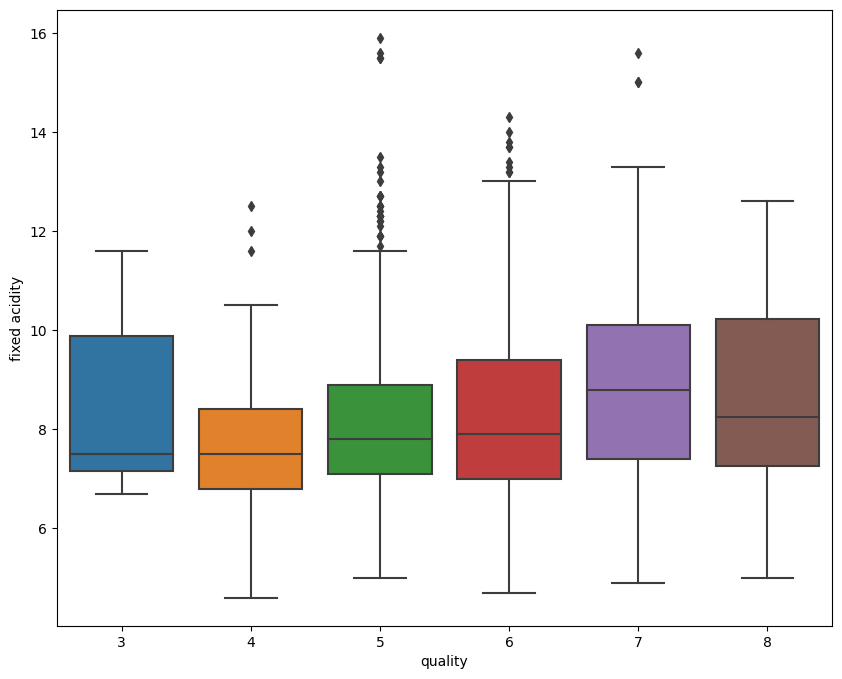

In [ ]:
# Create a boxplot to analyze the relationship between wine quality and fixed acidity.
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['quality'], y=df['fixed acidity'])


### From the boxplot, it is evident that as the fixed acidity increases, the wine's quality rating tends to improve. This suggests a positive correlation between fixed acidity and wine quality, making fixed acidity an important factor in determining wine quality.

**Explanation:**

- We generate a boxplot, a type of visualization that provides insights into the distribution of fixed acidity for different wine quality ratings.
- The x-axis represents wine quality, while the y-axis shows the distribution of fixed acidity.
- This boxplot allows us to observe how the fixed acidity varies among different quality ratings of wine. It's an essential step in understanding the factors affecting wine quality.



Text(0, 0.5, 'pH')

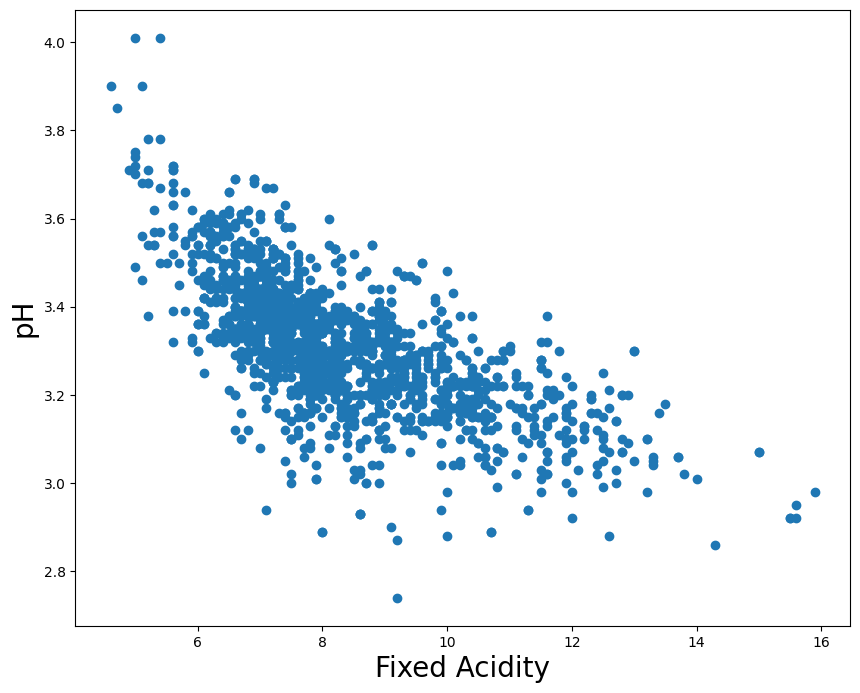

In [ ]:
# Create a scatter plot to analyze the relationship between fixed acidity and pH.
plt.figure(figsize=(10, 8))
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('Fixed Acidity', fontsize=20)
plt.ylabel('pH', fontsize=20)

### Understanding the Relationship Between pH and Acidity

**Note:**
1. A pH range of 1-7 is considered acidic.
2. A pH of 0 represents pure water.
3. A pH range of 7-14 is categorized as basic.

From this note, we can infer that lower pH values indicate higher acidity in substances, including wine.

**Key Insights:**
- Wines typically have a pH range between 2.9 and 3.9.
- In the scatter plot generated by the code, fixed acidity (x-axis) and pH (y-axis) are analyzed.
- The plot allows us to observe how changes in fixed acidity levels correspond to alterations in pH values.
- This insight aids in understanding the acidity levels in wine and their correlation with pH.


### Relationship between pH & Quality

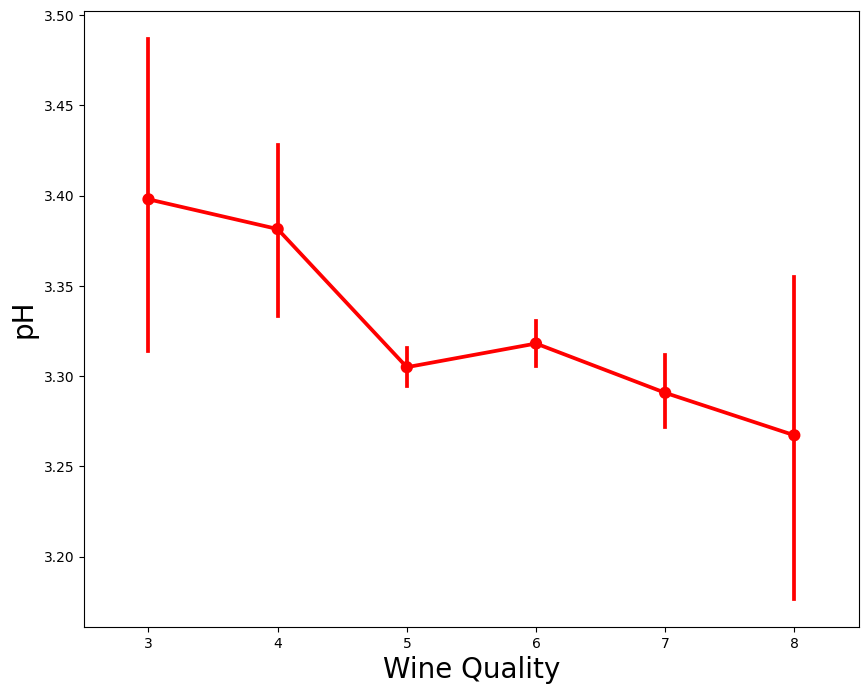

In [17]:
# Create a point plot to visualize the relationship between wine quality and pH.
plt.figure(figsize=(10,8))
sns.pointplot(x=df['quality'], y=df['pH'], color='red')
plt.xlabel('Wine Quality').set_size(20)
plt.ylabel('pH').set_size(20)


### Relationship Between Wine Quality and Acidity (pH)

**Observation:**
- In the generated point plot, the x-axis represents wine quality ratings, while the y-axis corresponds to the pH levels of the wines.
- The points on the plot provide insights into how pH levels vary with different wine quality ratings.

**Key Findings:**
- The point plot demonstrates that as wine quality ratings increase, there is a gradual decrease in pH levels. This indicates that higher quality wines tend to be more acidic.
- The red color of the plot emphasizes the importance of this correlation.


### Relationship between Citric Acid & Quality

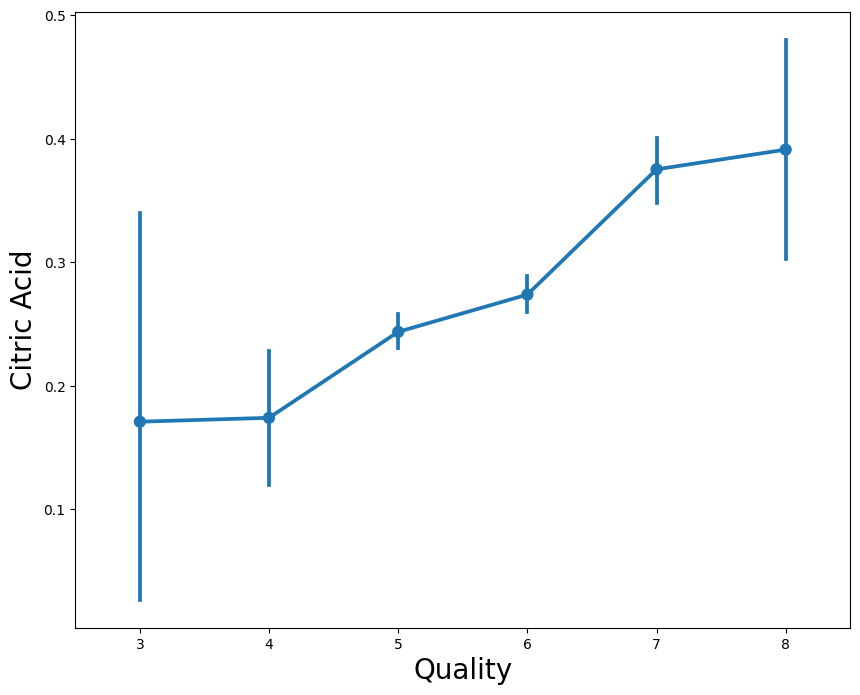

In [ ]:
# Create a point plot to explore the relationship between citric acid content and wine quality.
plt.figure(figsize=(10,8))
sns.pointplot(x=df['quality'], y=df['citric acid'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Citric Acid').set_size(20)

### Relationship Between Citric Acid and Wine Quality

**Observation:**
- The code generates a point plot to investigate the relationship between wine quality ratings and the citric acid content in the wines.
- The x-axis represents wine quality, while the y-axis represents the amount of citric acid.

**Key Findings:**
- The point plot shows that as the citric acid content increases, wine quality tends to be higher.
- Citric acid is used in winemaking to acidify wines that are too basic after primary fermentation. It also serves as a countermeasure against yeast converting citric acid into acetic acid, which can spoil wine quality.

**Explanation:**
- This visualization helps us understand how citric acid contributes to the perceived quality of wines. Wines with higher citric acid levels are often associated with improved quality ratings.


### Relationship between SO2 & Quality

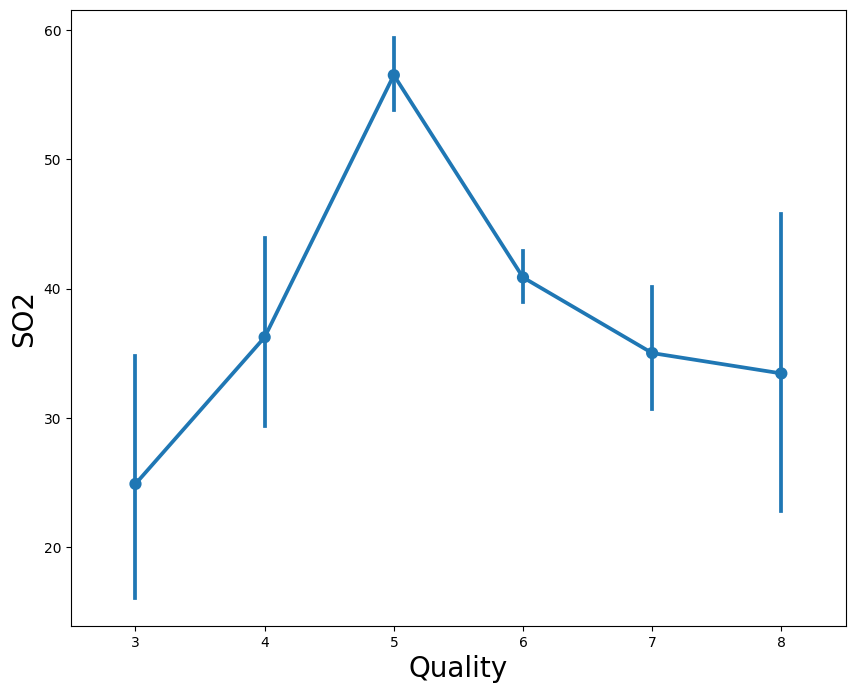

In [ ]:
# Create a point plot to explore the relationship between sulfur dioxide (SO2) content and wine quality.
plt.figure(figsize=(10,8))
sns.pointplot(x=df['quality'], y=df['total sulfur dioxide'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('SO2').set_size(20)


### Relationship Between Sulfur Dioxide (SO2) and Wine Quality

**Observation:**
- The code generates a point plot to investigate the relationship between wine quality ratings and the total sulfur dioxide (SO2) content in the wines.
- The x-axis represents wine quality, while the y-axis represents the SO2 content.

**Key Findings:**
- The point plot illustrates how the SO2 content varies with different wine quality ratings.
- Quality ratings 4 and 8 have a similar SO2 content of around 35, while quality rating 5 has the highest SO2 content at 57.
- This visualization helps us understand the relationship between SO2 levels and wine quality, providing insights into quality control and winemaking practices.

**Explanation:**
- Sulfur dioxide (SO2) is commonly used in winemaking to prevent oxidation and inhibit the growth of unwanted microbes. This point plot allows us to analyze how SO2 content is distributed across wine quality ratings, potentially revealing patterns that impact wine quality.


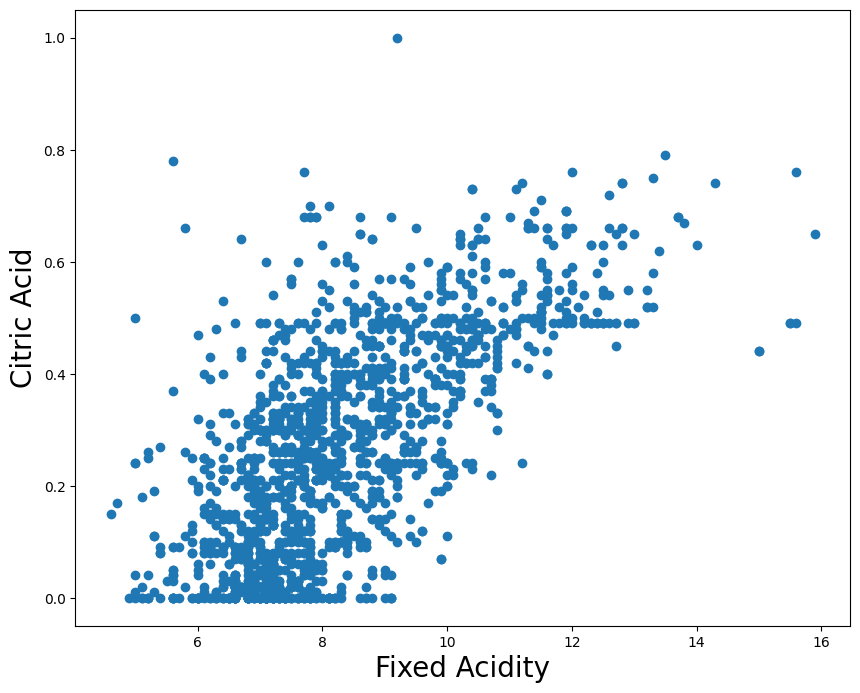

In [ ]:
# Create a scatter plot to analyze the relationship between fixed acidity and citric acid in the dataset.
plt.figure(figsize=(10,8))
plt.scatter(x=df['fixed acidity'], y=df['citric acid'])
plt.xlabel('Fixed Acidity').set_size(20)
plt.ylabel('Citric Acid').set_size(20)

### Relationship Between Fixed Acidity and Citric Acid

**Observation:**
- The code generates a scatter plot to explore the relationship between fixed acidity and citric acid in the dataset.
- The x-axis represents fixed acidity, while the y-axis represents citric acid.

**Explanation:**
- The scatter plot provides a visual representation of how citric acid levels are distributed concerning changes in fixed acidity. By examining this plot, we can gain insights into the correlation between these two chemical properties in the dataset.


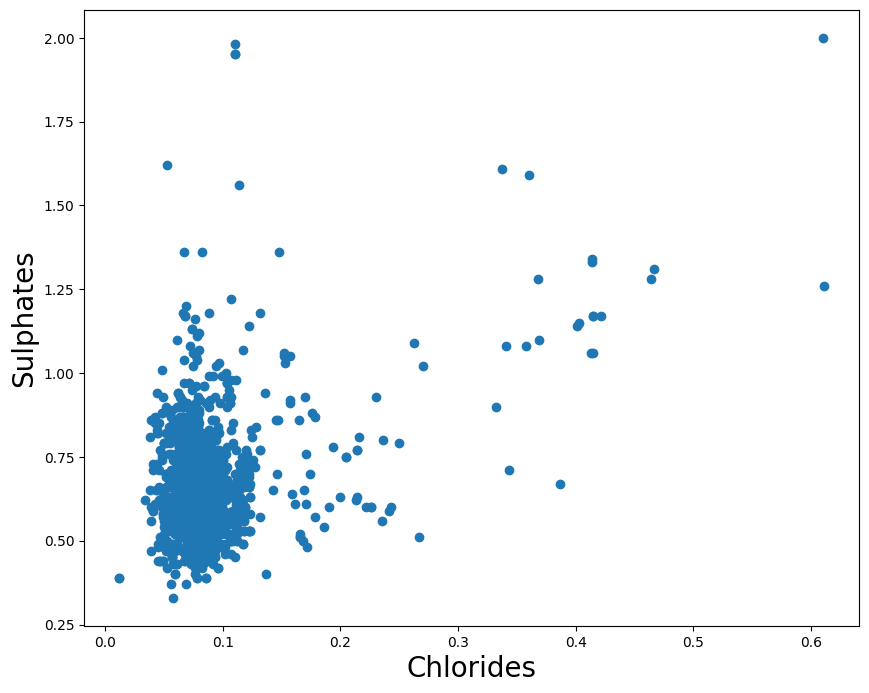

In [ ]:
# Create a scatter plot to analyze the relationship between chlorides and sulphates in the dataset.
plt.figure(figsize=(10,8))
plt.scatter(x=df['chlorides'], y=df['sulphates'])
plt.xlabel('Chlorides').set_size(20)
plt.ylabel('Sulphates').set_size(20)

### Relationship Between Chlorides and Sulphates

**Observation:**
- The code generates a scatter plot to examine the relationship between chlorides and sulphates in the dataset.
- The x-axis represents chlorides, while the y-axis represents sulphates.

**Explanation:**
- The scatter plot visually illustrates how the content of sulphates varies concerning changes in chloride levels. While there is a positive correlation between the two, it is interesting to note that wines with lower chloride content tend to have higher sulphate levels. This insight can be valuable for understanding the chemical composition of wines.


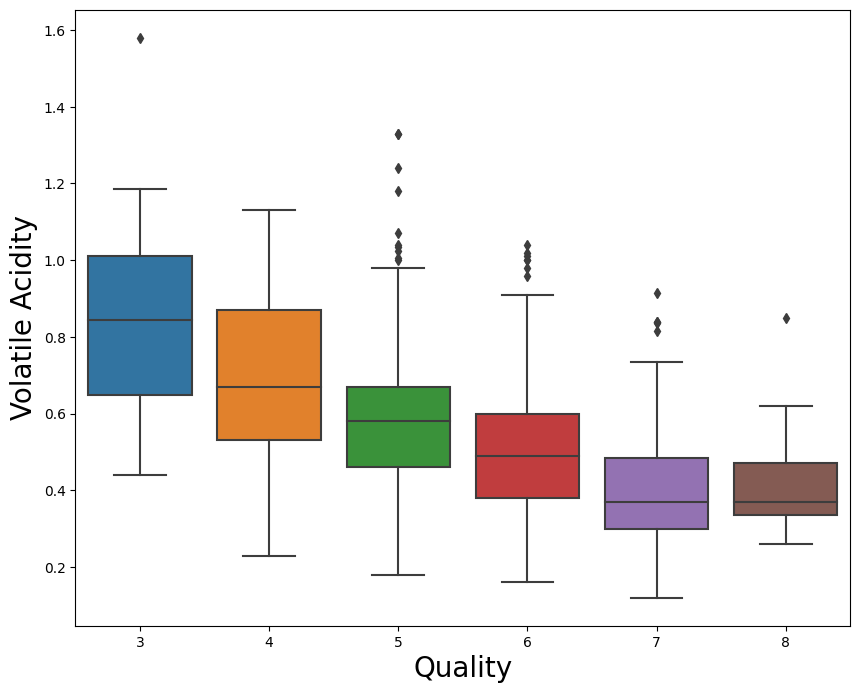

In [ ]:
# Create a boxplot to analyze the relationship between wine quality and volatile acidity.
plt.figure(figsize=(10,8))
sns.boxplot(x=df['quality'], y=df['volatile acidity'])
plt.xlabel('Quality').set_size(20)
plt.ylabel('Volatile Acidity').set_size(20)

### Relationship Between Volatile Acidity and Wine Quality

**Observation:**
- The code generates a boxplot to explore the connection between wine quality and volatile acidity.
- The x-axis represents wine quality ratings, and the y-axis shows the distribution of volatile acidity for each quality category.

**Explanation:**
- The boxplot reveals how the quality of wine varies in relation to volatile acidity. Volatile acidity can negatively impact wine quality, and this visualization highlights the relationship between the two. As volatile acidity increases, wine quality tends to decrease. This information is essential for understanding the factors influencing wine quality.

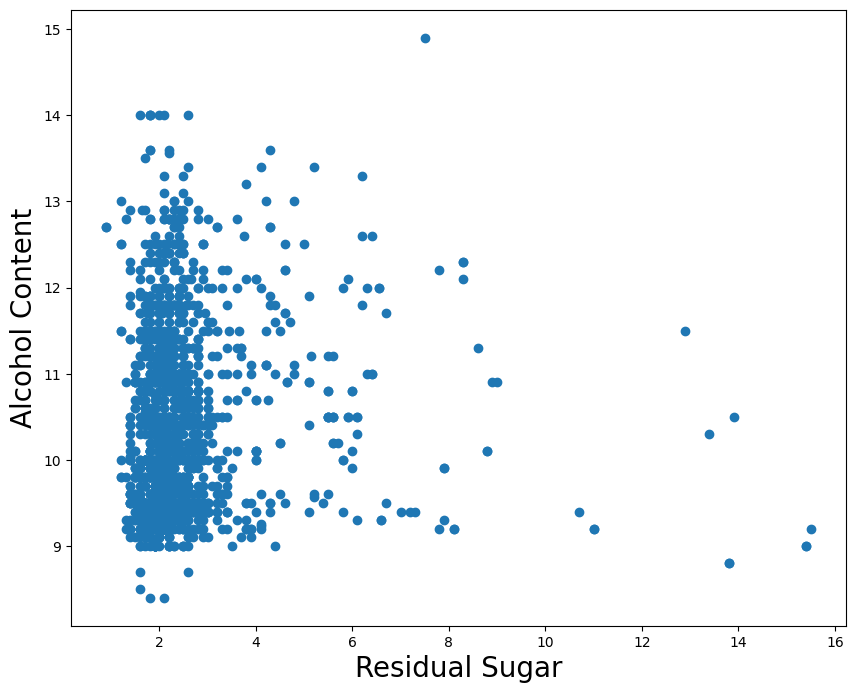

In [ ]:
# Create a scatter plot to explore the relationship between residual sugar and alcohol content.
plt.figure(figsize=(10,8))
plt.scatter(x=df['residual sugar'], y=df['alcohol'])
plt.xlabel('Residual Sugar').set_size(20)
plt.ylabel('Alcohol Content').set_size(20)

### Relationship Between Residual Sugar and Alcohol Content

**Observation:**
- The code generates a scatter plot to examine the connection between residual sugar and alcohol content in the dataset.
- The x-axis represents residual sugar levels, and the y-axis shows alcohol content.

**Explanation:**
- The scatter plot visually portrays the relationship between residual sugar and alcohol content in the dataset. It helps us understand how sugar levels correlate with alcohol content in wines. Notably, the majority of the data points are clustered around quality 2 and sugar levels between 9 and 13, suggesting a potential relationship between these factors.


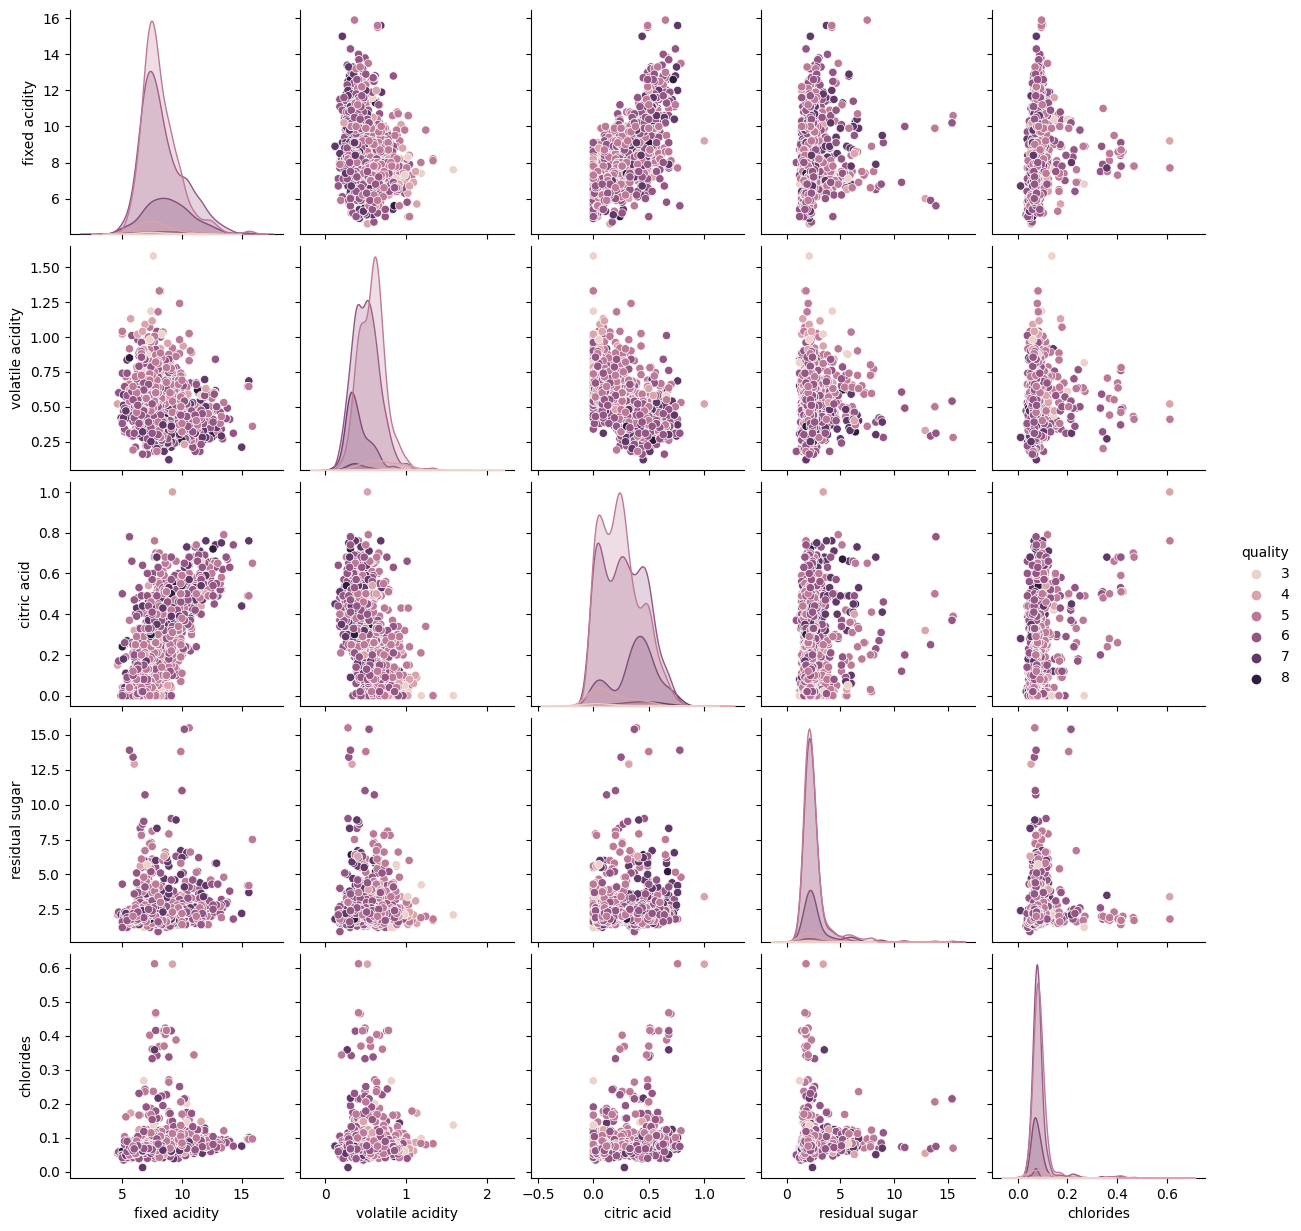

In [18]:
# Select a subset of features for pair plotting
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'quality']

# Create a pair plot to visualize relationships between selected features, colored by wine quality.
sns.pairplot(df[features_to_plot], hue='quality')
plt.show()



### Pair Plot for Selected Features

**Observation:**
- The code generates a pair plot to explore relationships between specific features in the dataset.

**Explanation:**
- The pair plot allows us to visualize how different features are related to one another. The selected features include 'fixed acidity,' 'volatile acidity,' 'citric acid,' 'residual sugar,' and 'chlorides,' while data points are colored according to wine quality. The pair plot aids in identifying patterns and correlations between these attributes, offering insights into which features might influence wine quality.

In [ ]:
# Hypothesis Test: T-Test
from scipy import stats
# Two quality groups (e.g., high quality and low quality)
high_quality = df[df['quality'] >= 7]
low_quality = df[df['quality'] <= 4]

# Performing a t-test on the 'alcohol' feature for the two groups
t_stat, p_value = stats.ttest_ind(high_quality['alcohol'], low_quality['alcohol'])

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 9.276284452170346
P-Value: 5.1143625638205275e-18


### Hypothesis Test: T-Test for Alcohol Content

**Observation:**
- In this section, we perform a t-test to compare the alcohol content of two quality groups: high-quality wines (quality >= 7) and low-quality wines (quality <= 4).

**Explanation:**
- The code first creates two distinct groups based on wine quality: high quality (quality >= 7) and low quality (quality <= 4).
- A t-test is then conducted on the 'alcohol' feature for these two groups. The t-test provides statistical evidence to determine if there is a significant difference in alcohol content between high-quality and low-quality wines.
- The results are as follows:
  - T-Statistic: 9.276 (a measure of the difference in means between the two groups)
  - P-Value: 5.114e-18 (an extremely low p-value, indicating a statistically significant difference)
- Based on the very low p-value, we conclude that there is strong evidence to reject the null hypothesis, suggesting a significant difference in alcohol content between high-quality and low-quality wines. This finding could be a crucial factor affecting wine quality.


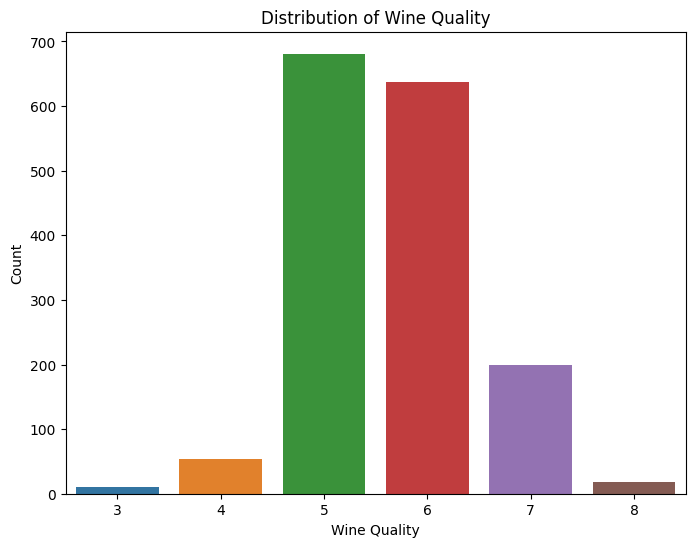

In [ ]:
# Createing a countplot to visualize wine quality distribution
# We use Seaborn's countplot to create a bar plot showing the distribution of wine quality ratings.
# The x-axis represents wine quality, and the y-axis represents the count of wines in each category.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()



**Consultation on Wine Quality Based on Categorical Plot Results:**

**1. Prevalence of Average Quality Wines:**
   - Quality ratings of 5 and 6 are the most common, representing average-quality wines found in the dataset.

**2. Limited Extreme Ratings:**
   - Wines with quality ratings of 3 and 8 are rare, indicating a scarcity of very low and very high-quality wines.

**3. Common High-Quality Wines:**
   - Quality 7, associated with high-quality wines, is more frequent than low-quality ratings, suggesting a presence of above-average quality wines.

# Conclusion
Our exploratory data analysis of the red wine quality dataset provided valuable insights into the factors influencing wine quality. The analysis highlighted the importance of various chemical properties and their relationship with quality ratings. These insights can be valuable for winemakers and consumers alike.

